In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from joblib import dump, load
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset set up

In [2]:
train_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/train.csv')
train_df = train_df.drop('id', axis = 1)

In [3]:
train_y = train_df['FloodProbability']
train_x = train_df.drop('FloodProbability', axis = 1)

## Exploratory Data Analysis (EDA)
looking at the data to see if anything interesting comes up to give us ideas for feature engineering

In [4]:
train_df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


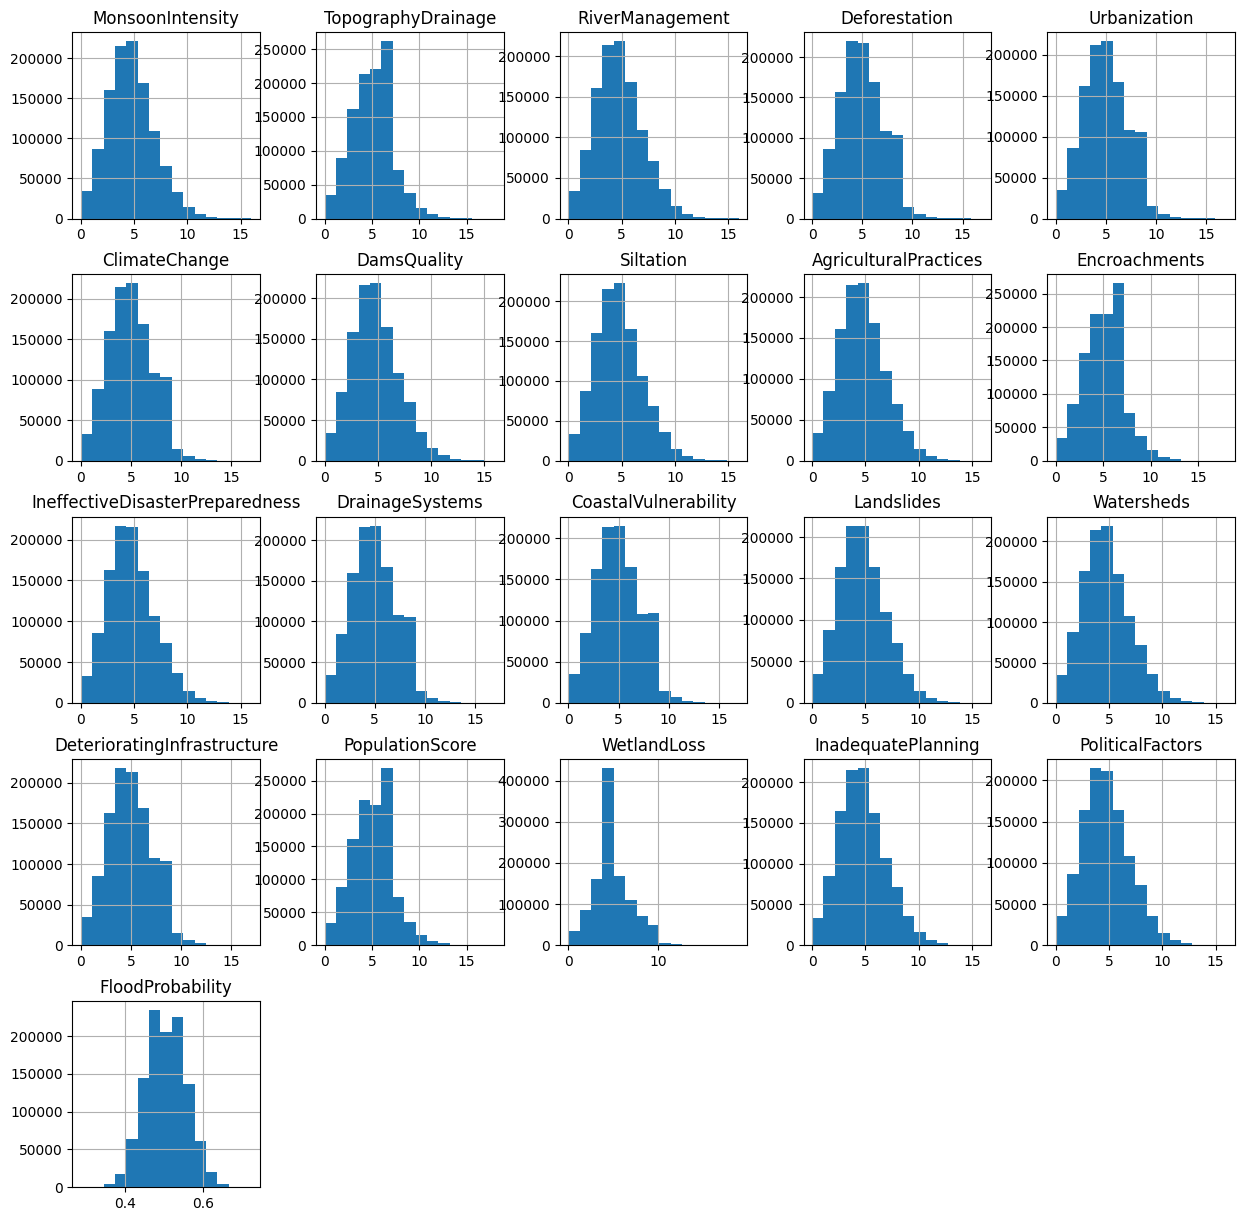

In [7]:
train_df.hist(bins=15, figsize=(15, 15))
plt.show()

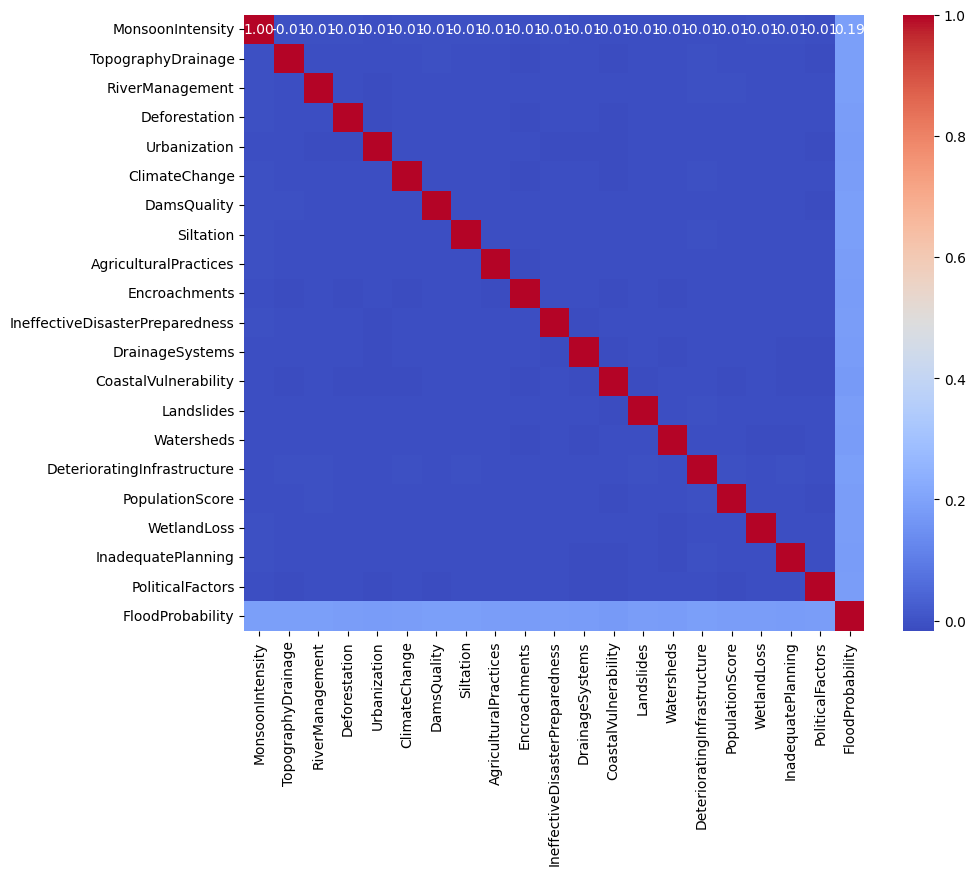

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

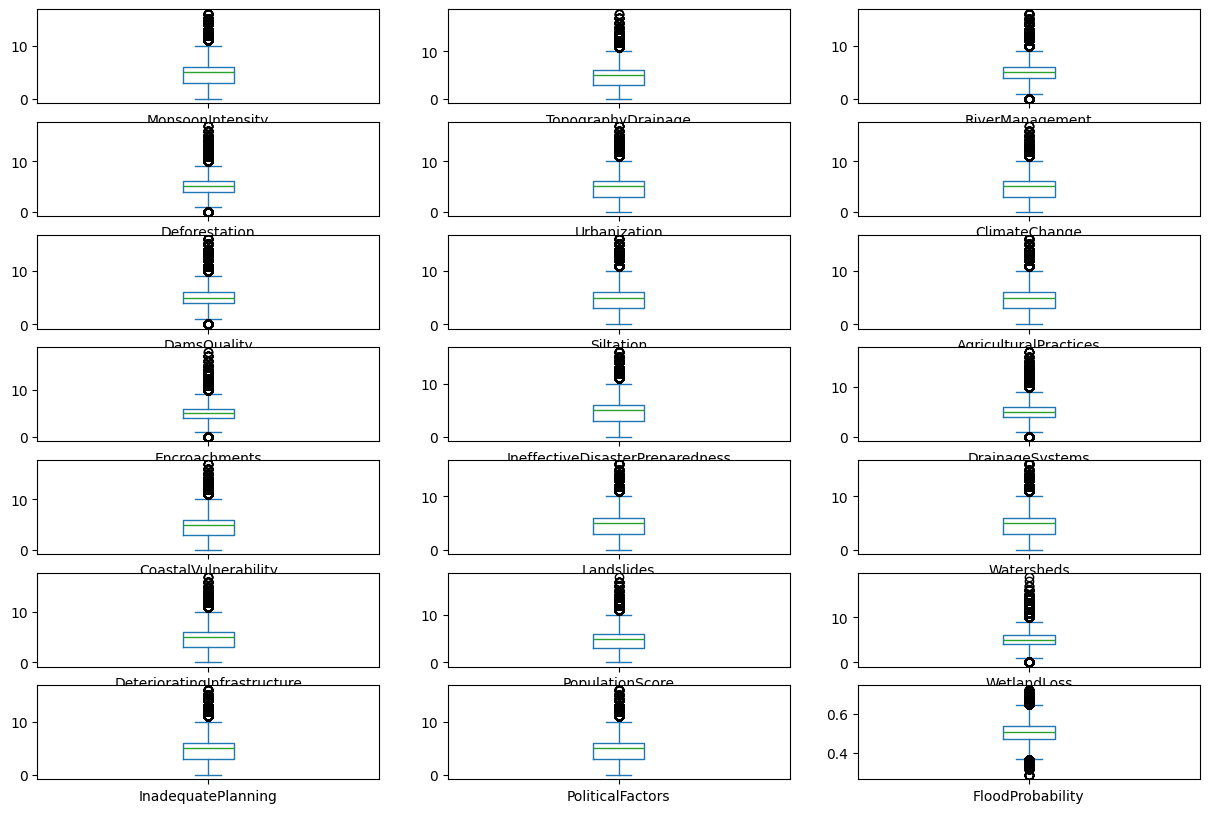

In [11]:
train_df.plot(kind='box', subplots=True, layout=(7,3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

## EDA Results
I think this is a synthetic dataset, so not really anything interesting! The distributions generally are normal, but there are some weird skews in some of them. However, as we're using tree-based methods, this doesn't really matter (but normalization might be useful for other methods) 

## Experiment 1 - Forest on all features
First we use just a random forest, with grid search to find the best hyperparameters. We also use this as one submission, and get not very good results. Possible/probable that we didn't allow enough estimators, due to memory restrictions. 

In [3]:
regressor = RandomForestRegressor(verbose = 1)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [4, 8, 16]}

In [5]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs = -1)
grid_search.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Do

GridSearchCV(estimator=RandomForestRegressor(verbose=1), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16],
                         'n_estimators': [50, 100, 200]})

In [6]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 16, 'n_estimators': 200}


In [7]:
best_forest = grid_search.best_estimator_

In [8]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = best_forest.predict(test_x)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   52.3s


In [11]:
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})

result_df.to_csv('rf_predictions.csv', index=False)

## Results of Experiment 1
Accuracy with random forest with 16 depth and 200 predictors (best performing forest) using all features was very poor, 0.58698

## Experiment 4 - Bigger forests
Same as experiment 1 but with many more predictors

In [ ]:
regressor = RandomForestRegressor(verbose = 1)
param_grid = {'n_estimators': [200, 300, 400], 'max_depth': [4, 8, 16]}
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs = -1)
grid_search.fit(train_x, train_y)

print("Best parameters:", grid_search.best_params_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.5min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  6.2min
[Parallel(n_jobs=1)]: Do

Best parameters: {'max_depth': 16, 'n_estimators': 400}


In [7]:
best_forest = grid_search.best_estimator_
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = best_forest.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})

result_df.to_csv('brf_predictions.csv', index=False)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   50.2s


## Experiment 4 results
not much better than experiment 1. 0.58749 accuracy. The grid search is still telling us that the best performance is coming from the most complext models, but we seem to be getting a bit of a slow down in return on investment. So, for now, we'll stop with random forests

## Experiment 5 - Boosting
Then we take a gradient boosting approach, again using grid search

In [12]:
boosted_regressor = GradientBoostingRegressor(verbose = 1)
boosted_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1]}

In [19]:
boosted_grid_search = GridSearchCV(estimator=boosted_regressor, param_grid=boosted_param_grid, n_jobs = -1)
boosted_grid_search.fit(train_x, train_y)
print("Best parameters:", boosted_grid_search.best_params_)

      Iter       Train Loss   Remaining Time 
         1           0.0026           16.95m
         2           0.0026           16.82m
         3           0.0026           16.71m
         4           0.0026           16.59m
         5           0.0026           16.48m
         6           0.0026           16.34m
         7           0.0026           16.25m
         8           0.0026           16.20m
         9           0.0026           16.14m
        10           0.0026           16.06m
        20           0.0025           15.16m
        30           0.0025           14.31m
        40           0.0025           13.49m
        50           0.0024           12.64m
        60           0.0024           11.78m
        70           0.0024           10.96m
        80           0.0023           10.12m
        90           0.0023            9.28m
       100           0.0023            8.42m
       200           0.0020            0.00s
      Iter       Train Loss   Remaining Time 
        

In [20]:
print("Best parameters:", boosted_grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}


In [21]:
boosted_estimator = boosted_grid_search.best_estimator_

In [22]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = boosted_estimator.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('boosted_predictions.csv', index=False)

In [24]:
optimal_estimators = boosted_estimator.n_estimators_
print(optimal_estimators)

300


## Experiment 5 Results
Much better accuracy than random forests, we're now up to 0.81 accuracy. However, from grid search and retraining, we can see that all estimators are being used. So we are going to try with more estimators, but the same learning rate (0.1)

## Experiment 6 - Bigger boosting
Boosting with more estimators

In [26]:
boosted_regressor = GradientBoostingRegressor(learning_rate = 0.1)
boosted_param_grid = {'n_estimators': [300, 500, 1000]}
boosted_grid_search = GridSearchCV(estimator=boosted_regressor, verbose = 2, param_grid=boosted_param_grid, n_jobs = -1)
boosted_grid_search.fit(train_x, train_y)
print("Best parameters:", boosted_grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=300; total time=23.4min
[CV] END ...................................n_estimators=300; total time=23.4min
[CV] END ...................................n_estimators=300; total time=23.6min
[CV] END ...................................n_estimators=300; total time=24.0min
[CV] END ...................................n_estimators=300; total time=24.5min
[CV] END ...................................n_estimators=500; total time=33.7min
[CV] END ...................................n_estimators=500; total time=33.7min
[CV] END ...................................n_estimators=500; total time=33.8min
[CV] END ...................................n_estimators=500; total time=34.0min
[CV] END ...................................n_estimators=500; total time=37.7min
[CV] END ..................................n_estimators=1000; total time=56.1min
[CV] END ..................................n_esti

In [38]:
boosted_estimator = boosted_grid_search.best_estimator_
optimal_estimators = boosted_estimator.n_estimators_
print(optimal_estimators)

1000


In [29]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = boosted_estimator.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('bboosted_predictions.csv', index=False)

## Experiment 6 Results
Better than experiment 5 - we got 0.84 accuracy now. However, again it just goes to the most complex model

## Experiment 7 - Stacking
Stacking the booster with the random forest. Using the best params from the grid search but taking into account model complexity. We therefore don't use 400 estimators for random forest. SVR as final predictor

In [ ]:
regressor1 = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, verbose = 1)
regressor2 = RandomForestRegressor(n_estimators = 200, max_depth = 16, verbose = 1)

estimators = [('GB', regressor1), ('RF', regressor2)]
stacked_regressor = StackingRegressor(estimators = estimators, final_estimator = SVR(), verbose = 4, n_jobs = -1)

stacked_regressor.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  7.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  7.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 10.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 10.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 10.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 10.5min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 27.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed: 34.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   2 out of   5 

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(n_estimators=1000,
                                                         verbose=1)),
                              ('RF',
                               RandomForestRegressor(max_depth=16,
                                                     n_estimators=200,
                                                     verbose=1))],
                  final_estimator=SVR(), n_jobs=-1, verbose=4)

In [57]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = stacked_regressor.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('stacked_predictions.csv', index=False)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   56.8s


In [58]:
forest = stacked_regressor.named_estimators_['RF']
boosted = stacked_regressor.named_estimators_['GB']

In [60]:
dump(forest, 'random_forest_model.joblib')
dump(boosted, 'gradient_model.joblib')

['gradient_model.joblib']

## Experiment 7 results
Worse performance from stacking than from just boosting. From stacking we got 0.59 accuracy, which is just slightly better than random forest.

## Experiment 8 - Other boosting
Gradientboosting has only got us to 0.84 accuracy using sklearns gradientboostingregressor. We are going to try gradient histogram boosting and adaboost. First, grid search to find the best hyperparameters for each, then stacking them

In [9]:
hist_regressor = HistGradientBoostingRegressor()
param_grid = {'max_iter': [100,200,300,500,1000], 'learning_rate': [0.01,0.1]}
hist_grid_search = GridSearchCV(estimator=hist_regressor, param_grid=param_grid, n_jobs = -1)
hist_grid_search.fit(train_x, train_y)

print("Best parameters:", hist_grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_iter': 1000}


In [11]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = hist_grid_search.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('hist_predictions.csv', index=False)

Accuracy was about 0.835, and there wasn't a substantial difference between 300 trees and 1000 trees in terms of accuracy

In [13]:
ada_regressor = AdaBoostRegressor()
param_grid = {'n_estimators': [50,100,200,300]}
ada_grid_search = GridSearchCV(estimator=ada_regressor, param_grid=param_grid, n_jobs = -1)
ada_grid_search.fit(train_x, train_y)

print("Best parameters:", ada_grid_search.best_params_)

Best parameters: {'n_estimators': 100}


In [14]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = ada_grid_search.predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('ada_predictions.csv', index=False)

In [15]:
dump(hist_grid_search, 'hist_boost_model.joblib')
dump(ada_grid_search, 'ada_model.joblib')

['ada_model.joblib']

Ada actually performed a bit worse than even random forest

## Experiment 8 Results
Ada and Hist boosting both actually performed slightly worse on the dataset than the previous gradient boosting effort

## Experiment 9 - Stacking boosted results
We have two boosted predictors which get 0.84 accuracy - we will now stack them with another model to see if we can get any better results. The relationship between the outputs of one model and the outputs of another model are obviously related, but likely in a non-linear way. To deal with non linearity, we would like to use kernels but the dataset is massive so we would be here forever. So we will approximate the RBF kernel, then train a linear model with that. We will use a validation set from training, rather than using the test data (this is due to kaggle limits).

In [18]:
original_boosted_model = load('gradient_model.joblib')
hist_boosted_model = load('hist_boost_model.joblib')
models = [original_boosted_model, hist_boosted_model]

In [21]:
#creating new training dataset for SVR
result_df = pd.DataFrame()
for i in range(2):
    meta_x = models[i].predict(train_x)
    result_df[str(i)] = meta_x

In [25]:
meta_train_x, meta_test_x, meta_train_y, meta_test_y = train_test_split(result_df, train_y, test_size = 0.2)

Grid search with rbf approximator pipeline 

In [41]:
rbf_pipeline = Pipeline([
    ('rbf_sampler', RBFSampler()),
    ('sgd_regressor', SGDRegressor())
])

param_grid = {
    'rbf_sampler__gamma': [0.1, 0.5, 1.0, 2.0, 'scale'],
    'sgd_regressor__alpha': [0.0001, 0.001, 0.01],
    'sgd_regressor__max_iter': [1000, 5000, 10000]
}

rbf_grid_search = GridSearchCV(rbf_pipeline, param_grid, verbose=2, n_jobs=-1)
rbf_grid_search.fit(meta_train_x, meta_train_y)

print("Best parameters:", rbf_grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'rbf_sampler__gamma': 'scale', 'sgd_regressor__alpha': 0.0001, 'sgd_regressor__max_iter': 5000}


In [44]:
meta_test_y_hat = rbf_grid_search.predict(meta_test_x)

In [58]:
from sklearn.metrics import r2_score

print(f'with the meta predictor we have {r2_score(meta_test_y, meta_test_y_hat)}')
print('with first predictor (original) we have ' \
      + str(r2_score(meta_test_y, meta_test_x['0'])))
print('with second predictor (histogram) we have ' \
      + str(r2_score(meta_test_y, meta_test_x['1'])))

with the meta predictor we have 0.8488324523284165
with first predictor (original) we have 0.8434116253585979
with second predictor (histogram) we have 0.8406955879680941


We have some actual improvement using this method, so now we will stack it all together and try it on the test data

In [61]:
def rbf_predict(x):
    first_pred = original_boosted_model.predict(x)
    second_pred = hist_boosted_model.predict(x)
    total = pd.DataFrame({
        '0': first_pred,
        '1': second_pred
    })
    return(rbf_grid_search.predict(total))

In [63]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = rbf_predict(test_x)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('rbf_predictions.csv', index=False)

## Experiment 10 - Branching out from sklearn
Tabular data uses xgboost pretty often. So, we're going to use xgboost and lgbm and then maybe do the same stacking approach as the previous experiment. We will experiment first with a train test split, then retrain on the whole dataset and use the test data. We use grid search again to find the best hyperparams.

In [4]:
!pip install xgboost
!pip install lightgbm

In [5]:
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
import joblib

xgb_train_x, val_x, xgb_train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)

In [63]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', nthread=-1)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 500, 1000],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
xgb_grid_search.fit(xgb_train_x, xgb_train_y)

In [65]:
print(r2_score(val_y, xgb_grid_search.predict(val_x)))

0.8419149073696414


In [71]:
#saving the xgboost model trained on part of the training data
joblib.dump(xgb_grid_search.best_estimator_, 'partial_xgboost_model.pkl')

['partial_xgboost_model.pkl']

In [69]:
print('best xgboost params are: ' + str(xgb_grid_search.best_params_))

best xgboost params are: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1}


In [14]:
xgb_model = joblib.load('partial_xgboost_model.pkl')

best xgboost params are: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1}

In [8]:
lgbm_model = lgb.LGBMRegressor(n_jobs = -1)

param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [-1, 5, 10],
    'subsample': [0.8, 1], 
    'colsample_bytree': [0.8, 1.0]  
}

lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1)


In [ ]:
lgbm_grid_search.fit(xgb_train_x, xgb_train_y)

In [11]:
print(lgbm_grid_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 31, 'subsample': 0.8}


The best lgbm params were found to be {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 31, 'subsample': 0.8}

In [12]:
joblib.dump(lgbm_grid_search.best_estimator_, 'partial_lgbm_model.pkl')

['partial_lgbm_model.pkl']

In [13]:
print(r2_score(val_y, lgbm_grid_search.predict(val_x)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8409350880656077


In [15]:
lgbm_model = joblib.load('partial_lgbm_model.pkl')

In [16]:
rbf_pipeline = Pipeline([
    ('rbf_sampler', RBFSampler()),
    ('sgd_regressor', SGDRegressor())
])

param_grid = {
    'rbf_sampler__gamma': [0.1, 0.5, 1.0, 2.0, 'scale'],
    'sgd_regressor__alpha': [0.0001, 0.001, 0.01],
    'sgd_regressor__max_iter': [1000, 5000, 10000]
}

meta_train_x = pd.DataFrame({
    '0': xgb_model.predict(xgb_train_x),
    '1': lgbm_model.predict(xgb_train_x)
})

rbf_grid_search = GridSearchCV(rbf_pipeline, param_grid, verbose=2, n_jobs=-1)
rbf_grid_search.fit(meta_train_x, xgb_train_y)

print("Best parameters:", rbf_grid_search.best_params_)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'rbf_sampler__gamma': 'scale', 'sgd_regressor__alpha': 0.0001, 'sgd_regressor__max_iter': 5000}


Best parameters for the pipeline were found to be: Best parameters: {'rbf_sampler__gamma': 'scale', 'sgd_regressor__alpha': 0.0001, 'sgd_regressor__max_iter': 5000}

In [17]:
def rbf_predict(x, model_1, model_2, final_predictor):
    first_pred = model_1.predict(x)
    second_pred = model_2.predict(x)
    total = pd.DataFrame({
        '0': first_pred,
        '1': second_pred
    })
    return(final_predictor.predict(total))

In [18]:
print(r2_score(val_y, rbf_predict(val_x, xgb_model, lgbm_model, rbf_grid_search)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.8526136905756271


We got 0.85 r2 score now, which is the best we've had so far. We will now train xgboost and lgbm using the same hyperparams but on the entire training set 

In [19]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', nthread=-1, colsample_bytree= 1, learning_rate= 0.1, max_depth= 3, n_estimators= 1000, subsample = 1)

In [21]:
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, nthread=-1, num_parallel_tree=None, ...)

In [22]:
joblib.dump(xgb_model, 'full_xgboost_model.pkl')

['full_xgboost_model.pkl']

In [23]:
lgbm_model = lgb.LGBMRegressor(n_jobs = -1, colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 5, n_estimators= 1000, num_leaves= 31, subsample= 0.8)

In [25]:
lgbm_model.fit(train_x, train_y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 20
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=5,
              n_estimators=1000, n_jobs=-1, subsample=0.8)

In [27]:
rbf_pipeline = Pipeline([
    ('rbf_sampler', RBFSampler(gamma = 'scale')),
    ('sgd_regressor', SGDRegressor(alpha = 0.0001, max_iter = 5000))
])

In [28]:
total = pd.DataFrame({
        '0': xgb_model.predict(train_x),
        '1': lgbm_model.predict(train_x)
    })

rbf_pipeline.fit(total, train_y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Pipeline(steps=[('rbf_sampler', RBFSampler(gamma='scale')),
                ('sgd_regressor', SGDRegressor(max_iter=5000))])

In [29]:
test_df = pd.read_csv('gs://carddefaultdataset/playground-series-s4e5/playground-series-s4e5/test.csv')
test_ids = test_df['id']
test_x = test_df.drop('id', axis = 1)
test_y = rbf_predict(test_x, xgb_model, lgbm_model, rbf_pipeline)
result_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': test_y
})
result_df.to_csv('xg_and_lgbm_predictions.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


## Experiment 10 results
On the public leaderboard we now are up to 85% r2 score. This is just 2% off the highest score!

## Conclusions
Using tree methods is definitely the way to approach this problem. Unfortunately, the dataset is synthetic, and seems to have been synthesised in a relatively simple way. This makes it so that we can't do any really interesting feature engineering. I've spent a lot of money on google cloud resources doing this, so this is where i'll call it a day!